#ANN

VAMSHIKRISHNA M
191CS261


In [ ]:
# Import the libraries we need for this lab

# Using the following line code to install the torchvision library
# !conda install -y torchvision

#install required libraries
import pandas as pd
import numpy as np
#data visualization packages
import matplotlib.pyplot as plt
#keras packages
#importing required libraries..
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
#model evaluation packages
from sklearn.metrics import f1_score, roc_auc_score, log_loss
from sklearn.model_selection import cross_val_score, cross_validate




#loading the dataset...

In [ ]:

cifar=tf.keras.datasets.cifar10
(training_images,training_labels),(testing_images,testing_labels)=cifar.load_data()

In [ ]:
#checking the shape of images ...
training_images.shape


(50000, 32, 32, 3)

In [ ]:
training_labels.shape

(50000, 1)

#converting image pixel to  0 or 1...

In [ ]:
#dividing image pixel by 255 so that pixel comes in range 0 to 1...
training_images=training_images/255.0
testing_images=testing_images/255.0

#defining the model...

In [ ]:
#model creation

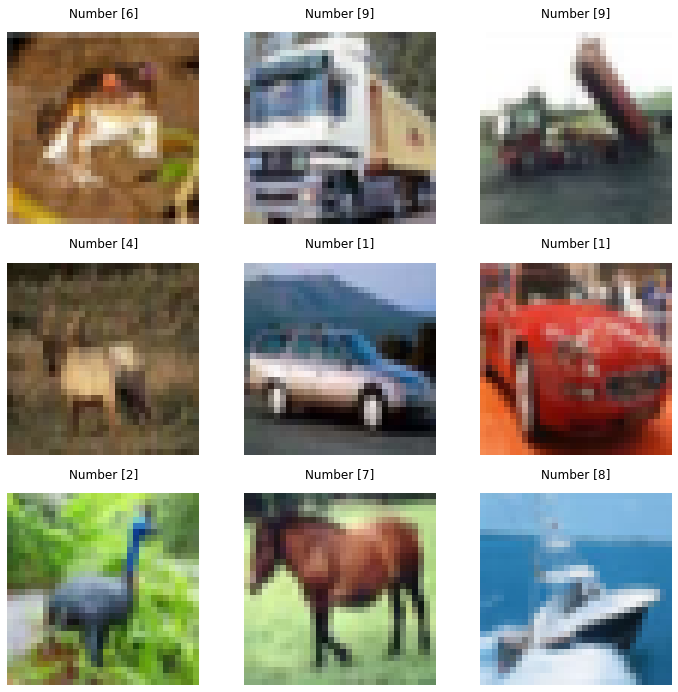

In [ ]:
# create figure with 3x3 subplots using matplotlib.pyplot
fig, axs = plt.subplots(3, 3, figsize = (12, 12))
plt.gray()

# loop through subplots and add mnist images
for i, ax in enumerate(axs.flat):
    ax.matshow(training_images[i])
    ax.axis('off')
    ax.set_title('Number {}'.format(training_labels[i]))
    
# display the figure
fig.show()

In [ ]:

model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32,32,3)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

#compiling  and training the model...

In [ ]:
#compiling the model...
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
#training data to the model...
model.fit(training_images,training_labels,epochs=50)

Epoch 1/50
1563/1563 [==============================] - 6s 3ms/step - loss: 1.8551 - accuracy: 0.3263
Epoch 2/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6998 - accuracy: 0.3889
Epoch 3/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6365 - accuracy: 0.4123
Epoch 4/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5877 - accuracy: 0.4308
Epoch 5/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5537 - accuracy: 0.4430
Epoch 6/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5301 - accuracy: 0.4533
Epoch 7/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5086 - accuracy: 0.4598
Epoch 8/50
1563/1563 [==============================] - 5s 4ms/step - loss: 1.4922 - accuracy: 0.4647
Epoch 9/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4770 - accuracy: 0.4701
Epoch 10/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.462

#evaluating the model for testing data..

In [ ]:

test_loss,test_acc=model.evaluate(testing_images,testing_labels)

313/313 [==============================] - 1s 3ms/step - loss: 1.5018 - accuracy: 0.4826


In [ ]:
print("Test accuracy:",test_acc*100)

Test accuracy: 48.260000348091125


In [ ]:
#predicting the data...
predictions=model.predict(testing_images)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
#y_pred= np.asarray(np.where(predictions == np.argmax(predictions)))
y_pred=predictions.argmax(axis=1);
y_pred=y_pred.reshape(y_pred.shape[0],1)

In [ ]:
predictions.shape

(10000, 10)

In [ ]:
y_pred.shape

(10000, 1)

In [ ]:
testing_labels.shape

(10000, 1)

#confusion matrix

In [ ]:
import seaborn as sns

In [ ]:
(confusion_matrix(y_pred,testing_labels))

array([[381,  17,  41,  12,  21,   9,   4,  19,  53,  15],
       [ 68, 634,  32,  33,  13,  23,  12,  18,  63, 173],
       [ 97,  12, 347, 100, 177,  83,  83,  41,  24,   9],
       [ 35,  15,  40, 207,  39, 140,  56,  25,  28,  14],
       [ 23,   8, 115,  46, 302,  49,  53,  39,  19,  11],
       [ 20,  13,  87, 197,  54, 381,  61,  70,  22,  17],
       [ 32,  22, 168, 222, 194, 124, 654,  54,  16,  20],
       [ 65,  28, 106,  93, 150, 123,  33, 645,  26,  47],
       [174,  59,  27,  25,  27,  28,   6,  18, 650,  69],
       [105, 192,  37,  65,  23,  40,  38,  71,  99, 625]])

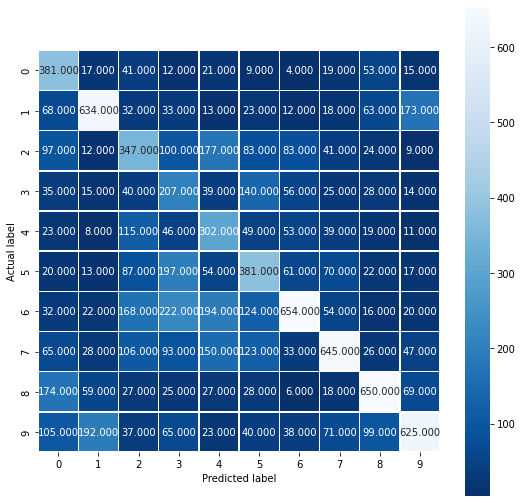

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
cm = confusion_matrix(y_pred,testing_labels)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

#classification report

In [ ]:
print(classification_report(y_pred,testing_labels))

              precision    recall  f1-score   support

           0       0.38      0.67      0.48       572
           1       0.63      0.59      0.61      1069
           2       0.35      0.36      0.35       973
           3       0.21      0.35      0.26       599
           4       0.30      0.45      0.36       665
           5       0.38      0.41      0.40       922
           6       0.65      0.43      0.52      1506
           7       0.65      0.49      0.56      1316
           8       0.65      0.60      0.62      1083
           9       0.62      0.48      0.54      1295

    accuracy                           0.48     10000
   macro avg       0.48      0.48      0.47     10000
weighted avg       0.53      0.48      0.49     10000

